<a href="https://colab.research.google.com/github/ninadcpa/dsc530/blob/main/Ninad_Patkhedkar_Week5_Exer_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5 Exercise 6.1

Author - Ninad Patkhedkar

In [1]:
from google.colab import drive
import sys
import os

# This code is to just use code checked out from github on google drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/Colab Notebooks/ThinkStats/ThinkStats2/code/')
os.chdir('/content/drive/MyDrive/Colab Notebooks/ThinkStats/ThinkStats2/code/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Lower: 3.0 , Upper: 3.69888313675259, Freq1: 4204.0, Freq2: 4204 
Lower: 3.69888313675259 , Upper: 3.9999565683801923, Freq1: 4729.0, Freq2: 4729 
Lower: 3.9999565683801923 , Upper: 4.176062305125079, Freq1: 6982.0, Freq2: 6982 
Lower: 4.176062305125079 , Upper: 4.301008280397, Freq1: 7157.0, Freq2: 7157 
Lower: 4.301008280397 , Upper: 4.397922636545316, Freq1: 7131.0, Freq2: 7131 
Lower: 4.397922636545316 , Upper: 4.477106777995652, Freq1: 6740.0, Freq2: 6740 
Lower: 4.477106777995652 , Upper: 4.54405563575924, Freq1: 6354.0, Freq2: 6354 
Lower: 4.54405563575924 , Upper: 4.602049133830196, Freq1: 5832.0, Freq2: 5832 
Lower: 4.602049133830196 , Upper: 4.653202862679622, Freq1: 5547.0, Freq2: 5547 
Lower: 4.653202862679622 , Upper: 4.698961318359521, Freq1: 5254.0, Freq2: 5254 
Lower: 4.698961318359521 , Upper: 4.740354793159152, Freq1: 5102.0, Freq2: 5102 
Lower: 4.740354793159152 , Upper: 4.77814401208196, Freq1: 4256.0, Freq2: 4256 
Lower: 4.77814401208196 , Upper: 4.812906675137891,

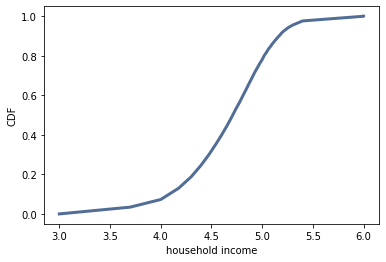

mean 74278.7075311872
std 93946.9299634784
median 51226.45447894046
skewness 4.949920244429579
pearson skewness 0.7361258019141795
cdf[mean] 0.660005879566872


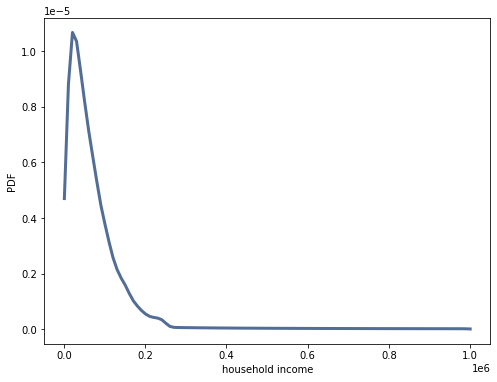

<Figure size 576x432 with 0 Axes>

In [2]:
from __future__ import print_function

import numpy as np

import density
import hinc
import thinkplot
import thinkstats2
import warnings
warnings.filterwarnings("ignore")

def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.
    Assumes that log10 income is uniform in each range.
    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range
    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.log_lower[0] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.log_upper[41] = log_upper

    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        print(f"Lower: {row.log_lower} , Upper: {row.log_upper}, Freq1: {row.freq}, Freq2: {int(row.freq)} ")
        #print("Upper: ", row.log_upper)
        #print("Freq1: ", row.freq)
        #print("Freq2: ", int(row.freq))
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample


def main():
    df = hinc.ReadData()
    log_sample = InterpolateSample(df, log_upper=6.0)

    log_cdf = thinkstats2.Cdf(log_sample)
    thinkplot.Cdf(log_cdf)
    thinkplot.Show(xlabel='household income',
                   ylabel='CDF')

    sample = np.power(10, log_sample)
    mean, median = density.Summarize(sample)

    cdf = thinkstats2.Cdf(sample)
    print('cdf[mean]', cdf[mean])

    pdf = thinkstats2.EstimatedPdf(sample)
    thinkplot.Pdf(pdf)
    thinkplot.Show(xlabel='household income',
                   ylabel='PDF')


if __name__ == "__main__":
    main()